#MNIST Handwritten Digit Classification Dataset
Modified National Institute of Standards and Technology dataset.

> It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [1]:
#Import libraries and modules
#mnist dataset is already available in the datasets module under Keras

from keras.datasets import mnist

from keras.layers import Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

from keras.utils import to_categorical
from keras.callbacks import Callback
from matplotlib import pyplot as plt


In [2]:
#Define hyper param and variables
batch_size = 128
num_classes = 10
epochs = 10

# inout imapge dimensions
img_x, img_y = 28, 28


In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

#Train: X=(60000, 28, 28), y=(60000,)
#Test: X=(10000, 28, 28), y=(10000,)

In [ ]:
plt.imshow(trainX[0])

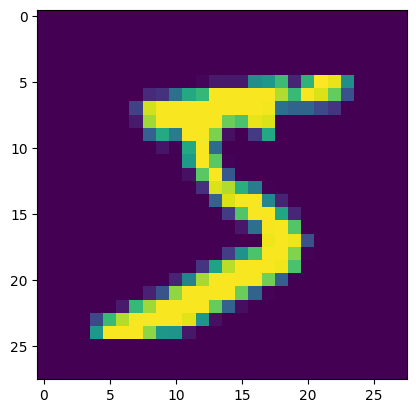

In [ ]:
print(trainy[0])
#trainy holds the actual digit corresponding to the trainX image. i.e 5

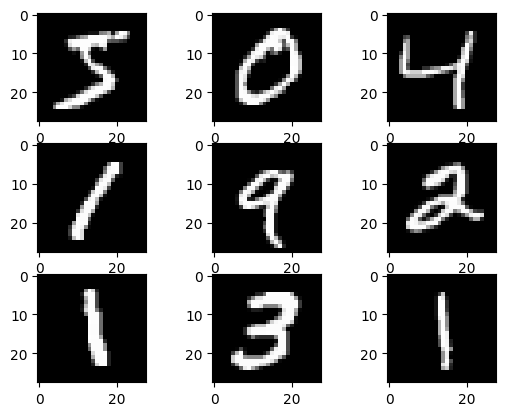

In [7]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

#Preprocessing


> All CNN i/p should be 4D tensor



In [8]:
#We are providing the data to a CNN, hence no need to flatten instead
#reshape x_train and x_test to be recasted as tensors of 4 dimensions
#All CNN i/p should be 4D tensor
#Reshape(No of samples, image size of each sample,”, no of channels)
#Since grayscale image no of channels = 1


trainX = trainX.reshape(trainX.shape[0], img_x,img_y, 1)
testX = testX.reshape(testX.shape[0], img_x,img_y, 1)
input_shape = (img_x, img_y, 1)



In [9]:
#input data integers > float
#Normalize x_train and x_test which has integers between 0 and 255 to
#floats between 0 and 1 by dividing by 255
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [ ]:
#View pre-processed data
print('trainX shape:', trainX.shape)
print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

#trainX shape: (60000, 28, 28, 1)
#60000 train samples
#10000 test samples

In [12]:
#Convert 1D array to 10D class metriices and view results
trainy = to_categorical(trainy, num_classes)
testy = to_categorical(testy, num_classes)


In [ ]:
print(trainy[0])
#trainy[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] #actual value was 5

•	Normalize trainX and testX which has integers between 0 and 255 to floats between 0 and 1 by dividing by 255 (grascaling vectors)
•	Convert the Y values trainy and testy which are class data between 0 and 9 to categorical data (as no in Y does not hold value but it is a category)
•	Example : 0,1st ,9th  neuron will fire value
*  0=[1,0,0,0,0,0,0,0,0,0]
*  1=[0,1,0,0,0,0,0,0,0,0]
*   9=[0,0,0,0,0,0,0,0,0,1]
*   5=[0,0,0,0,0,1,0,0,0,0]
  
•	In the example trainy[0] is 5, here 6th class is firing value


#Defining Baseline model

In [14]:
#CNN has Conv2D and MaxPooling2D layers
#Dense layer gets 1024 parameters
#Kernal =5*5*1 (1 is depth)
#2nd time we do not need to define input shape

# define cnn model
def baseline_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model



> Convolution + Relu + Maxpooling -> 1 block is repeated as required
Flatted the output -> dense layer









•	model.summary provides a summary of each layer including the number of trainable parameters.

> Number of trainable parameters for convolution layer

(#of filters in convolution layer) * (#neurons in layer + 1) = kernel_size param+1

( 64 )*((32 * 5 * 5) +1) = 51264

Flatten the array 4 * 4 * 64 into single vector -> vector of dimention 1024
*  Number of trainable parameters = (#neurons in prev layer +1)*(#neurons in next layer)
*  1024 +1 * 64 =65600
*  64+1 * 10=650
*  1 is for the bias

•	model.compile configures the model for training with all the hyperparameters
•	Takes the loss function as a parameter (predicted – actual value difference)
•	Future we need to reduce no of params
•	Output shape in summery – (None,784) here none will be replaced by  60000


In [ ]:
model = baseline_model()
model.summary()

"""Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 conv2d (Conv2D)             (None, 24, 24, 32)        832

 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0
 )

 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264

 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0
 2D)

 flatten (Flatten)           (None, 1024)              0

 dense (Dense)               (None, 64)                65600

 dense_1 (Dense)             (None, 10)                650

=================================================================
Total params: 118,346
Trainable params: 118,346
Non-trainable params: 0
_________________________________________________________________"""

# Viewing the model
Input Layer: Tensor of as many input samples (see ?), each of dimension 28*28 . ? = 60000
3 dimensional array (tensor)

Layer 1: Flatten each 28*28 image into a 1-D vector of length 784


Layer 2: A fully-connected neural network layer with 128 neurons

Layer 3: Build a 20% Dropout, that is, turn-off 20% neurons randomly in the previous layer each time . Helps each neuron to learn on its own and not depend on others, choosen on random

Layer 4: A fully-connected neural network layer with 10 neurons

Layer 5: Apply softmax activation to normalize across all 10 output neurons. The class which is most likely gets the highest value between 0 and 1 . We r normalizing the output b/w 0 and 1. Eg: it output = 0.6 i.e 0.6 percentage that the image is of class 0
Introduction to
.

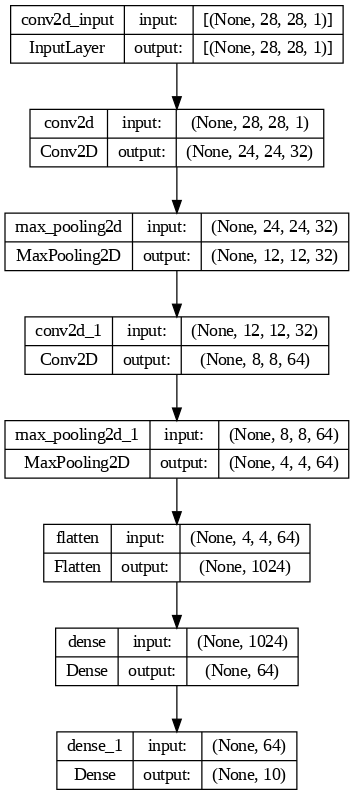

In [16]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=90)

# Model training

In [17]:
# Model training
#Since validation_data is also provided to model.fit, loss, accuracy is for the training data and val_loss and val_accuracy are for the validation data

# fit model
model_log=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(testX, testy))

Epoch 1/10
469/469 [==============================] - 16s 6ms/step - loss: 0.2089 - accuracy: 0.9392 - val_loss: 0.0527 - val_accuracy: 0.9850
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9838 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0367 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0280 - val_accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0264 - val_accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0233 - val_accuracy: 0.9923
Epoch

•	model.fit is used to perform the training of the model

•	epochs – The number of times the model learns through all the training samples

•	batch_size - Number of samples taken in one iteration before updating the weights .

*   Balances between memory utilization and stability
*   Since batch size = 32 and number of samples=60,000, each epoch has 60,000/32=1875 mini-batches	Even tho 1 epoch has to learn 60000 samples ,
*   take only 32 at a time , hence reducing memory usage a time.
*   Each batch – forward propagation adjust weight and back propagation

•	verbose – Provides detailed output after each epoch
•	loss – Loss function value at the end of the epoch . As learning continues loss decreases from 29% to 4% so on
•	accuracy - Calculates how often predictions equal labels. Becomes 1 when all predictions match expected value. In the output of fit function, accuracy is with respect to the training data


#Evaluate a model

In [18]:
# evaluate a model
def evaluate_model(model,model_log):
	print('Train loss:', model_log.history['loss'][-1])
	print('Train accuracy:', model_log.history['accuracy'][-1])

	print('Test loss:', model_log.history['val_loss'][-1])
	print('Test accuracy:', model_log.history['val_accuracy'][-1])

	# plot accuracy
	plt.subplot(2, 1, 1)
	plt.plot(range(1,11),model_log.history['accuracy'])
	plt.plot(range(1,11),model_log.history['val_accuracy'])
	plt.title('Model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train','test'],loc='lower right')
	# plot loss
	plt.subplot(2, 1, 2)
	plt.plot(range(1,11),model_log.history['loss'])
	plt.plot(range(1,11),model_log.history['val_loss'])
	plt.title('Model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train','test'],loc='upper right')

	plt.tight_layout()
	return

#If the graphs are similar for both train and test data, it
#is an indication no overfitting of train data

Train loss: 0.009424315765500069
Train accuracy: 0.9969333410263062
Test loss: 0.030419815331697464
Test accuracy: 0.9915000200271606


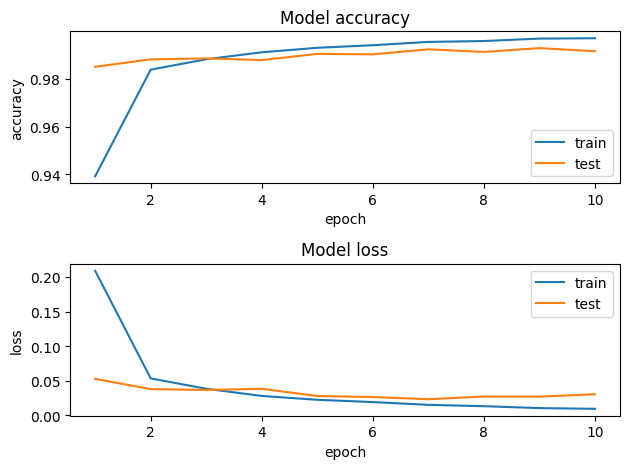

In [19]:
evaluate_model(model, model_log)

#Defining a small model

Kernel size of second convolution layer is


*   3*3 (baseline had 5*5)
*   Second maxpool pool_size is 5*5 (baseline had 2*2)


Number of trainable parameters fell from 118K (baseline) to 36K

Our dense layer example from previous module had 101K
Convolutional Neural

No change in overall structure of model but less params than the baseline model


In [20]:
# define cnn model
def small_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(5, 5)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = small_model()
model.summary()

'''Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832

 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0
 2D)

 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496

 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0
 2D)

 flatten_1 (Flatten)         (None, 256)               0

 dense_2 (Dense)             (None, 64)                16448

 dense_3 (Dense)             (None, 10)                650

=================================================================
Total params: 36,426
Trainable params: 36,426
Non-trainable params: 0
_________________________________________________________________'''

In [24]:
# Model training
#Since validation_data is also provided to model.fit, loss, accuracy is for the training data and val_loss and val_accuracy are for the validation data

# fit model
small_model_log=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(testX, testy))

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 0.3302 - accuracy: 0.9098 - val_loss: 0.0820 - val_accuracy: 0.9743
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.0572 - val_accuracy: 0.9816
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0434 - val_accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0394 - val_accuracy: 0.9866
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0374 - val_accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0296 - val_accuracy: 0.9906
Epoch 

Train loss: 0.019399099051952362
Train accuracy: 0.9937499761581421
Test loss: 0.037852540612220764
Test accuracy: 0.9879000186920166


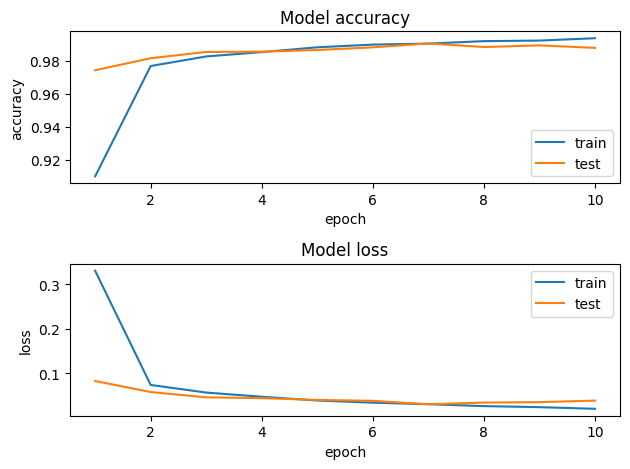

In [25]:
evaluate_model(small_model, small_model_log)